In [ ]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 62.4 MB/s eta 0:00:00


# Code

### RF Model and Visualize optimized

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Output directory created: /content/drive/MyDrive/Geo_Data/Geo_Task_04_Data
Loading study area boundaries...


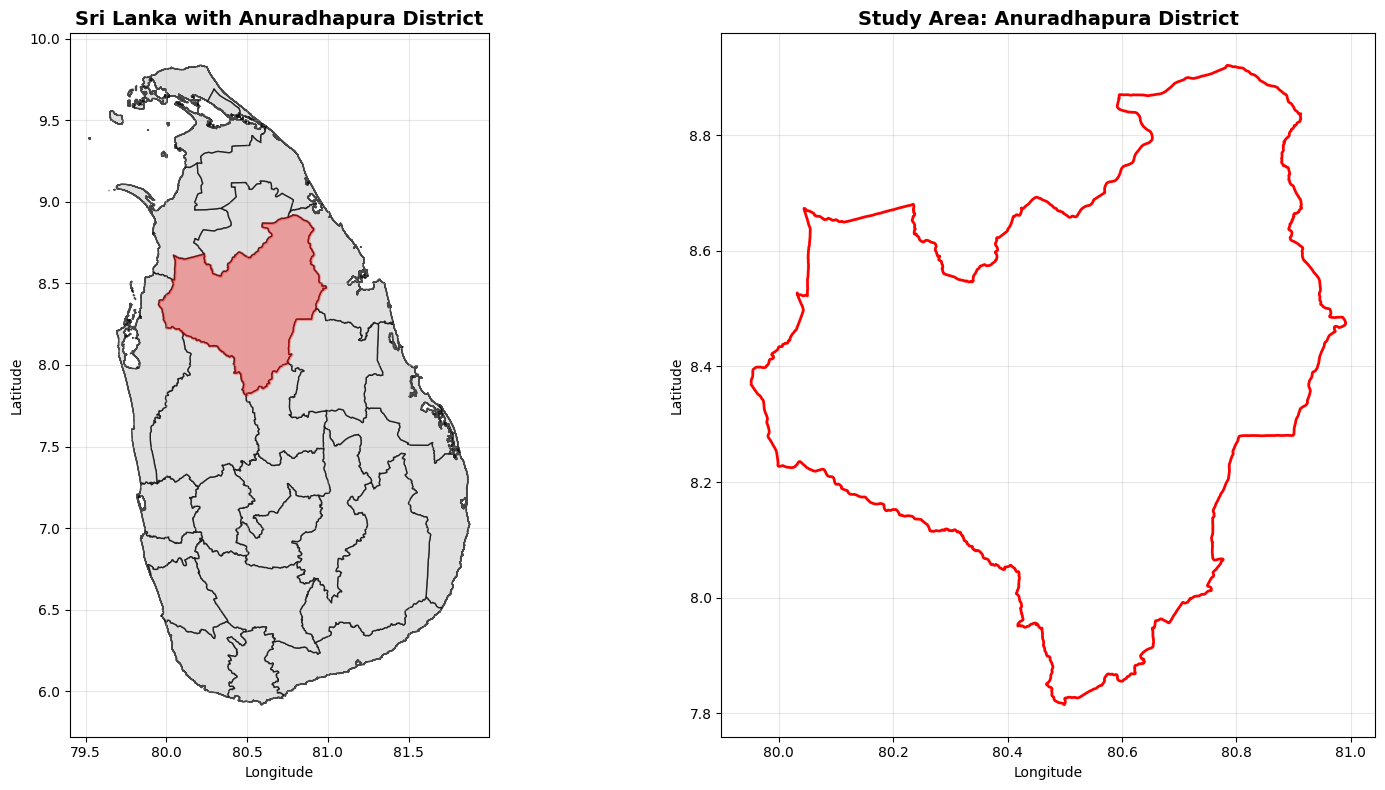

Study Area: Anuradhapura District
Approximate Area: ~7,179 km²

STARTING MULTI-TEMPORAL CLASSIFICATION

Processing 2017...

Processing Year: 2017
Loading satellite imagery...
Calculating NDVI...
Training Random Forest model...
Classification Accuracy: 0.7414

Classification Report:
              precision    recall  f1-score   support

      Forest       0.95      0.84      0.89   3607767
    Farmland       0.62      0.63      0.62   1124276
       Urban       0.02      0.42      0.04     29965
       Water       0.68      0.52      0.59    937268

    accuracy                           0.74   5699276
   macro avg       0.57      0.60      0.53   5699276
weighted avg       0.84      0.74      0.78   5699276



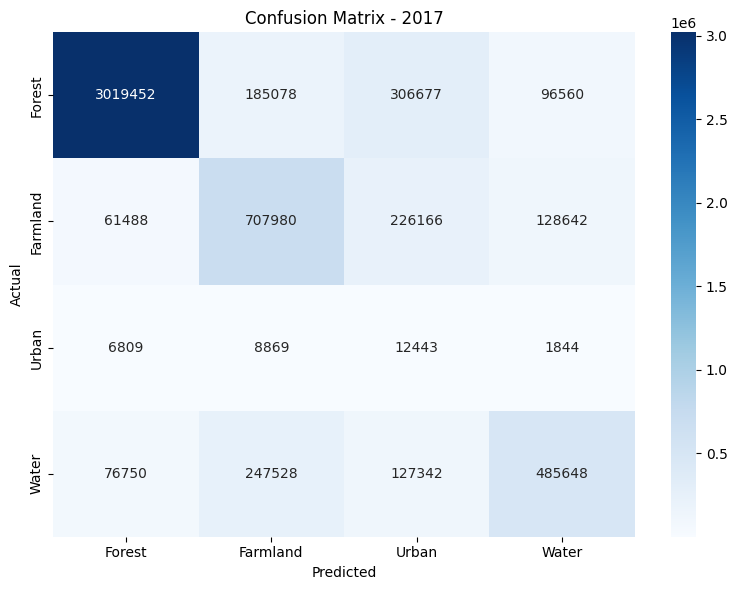

Classifying full scene...
Progress: 100.0%


Classification complete! Saved to: /content/drive/MyDrive/Geo_Data/Geo_Task_04_Data/classified_anuradhapura_2017.tif

=== Land Cover Statistics for 2017 ===
Forest: 332.37 km² (44.11%)
Farmland: 165.03 km² (21.90%)
Urban: 123.01 km² (16.33%)
Water: 133.09 km² (17.66%)

Processing 2018...

Processing Year: 2018
Loading satellite imagery...
Calculating NDVI...
Classifying full scene...
Progress: 100.0%


Classification complete! Saved to: /content/drive/MyDrive/Geo_Data/Geo_Task_04_Data/classified_anuradhapura_2018.tif

=== Land Cover Statistics for 2018 ===
Forest: 279.72 km² (37.12%)
Farmland: 141.69 km² (18.80%)
Urban: 226.75 km² (30.09%)
Water: 105.36 km² (13.98%)

Processing 2021...

Processing Year: 2021
Loading satellite imagery...
Calculating NDVI...
Classifying full scene...
Progress: 100.0%


Classification complete! Saved to: /content/drive/MyDrive/Geo_Data/Geo_Task_04_Data/classified_anuradhapura_2021.tif

=== Land Cover Statistics for 2021 ===
Forest: 242.61 km² (32.20%)
Farmland: 143.90 km² (19.10%)
Urban: 166.61 km² (22.11%)
Water: 200.39 km² (26.59%)

Processing 2022...

Processing Year: 2022
Loading satellite imagery...
Calculating NDVI...
Classifying full scene...
Progress: 100.0%


Classification complete! Saved to: /content/drive/MyDrive/Geo_Data/Geo_Task_04_Data/classified_anuradhapura_2022.tif

=== Land Cover Statistics for 2022 ===
Forest: 10.33 km² (1.37%)
Urban: 29.93 km² (3.97%)
Water: 713.23 km² (94.66%)

Processing 2024...

Processing Year: 2024
Loading satellite imagery...
Calculating NDVI...
Classifying full scene...
Progress: 100.0%


Classification complete! Saved to: /content/drive/MyDrive/Geo_Data/Geo_Task_04_Data/classified_anuradhapura_2024.tif

=== Land Cover Statistics for 2024 ===
Forest: 154.39 km² (20.49%)
Farmland: 247.69 km² (32.87%)
Urban: 252.67 km² (33.53%)
Water: 98.76 km² (13.11%)

ALL CLASSIFICATIONS COMPLETE!


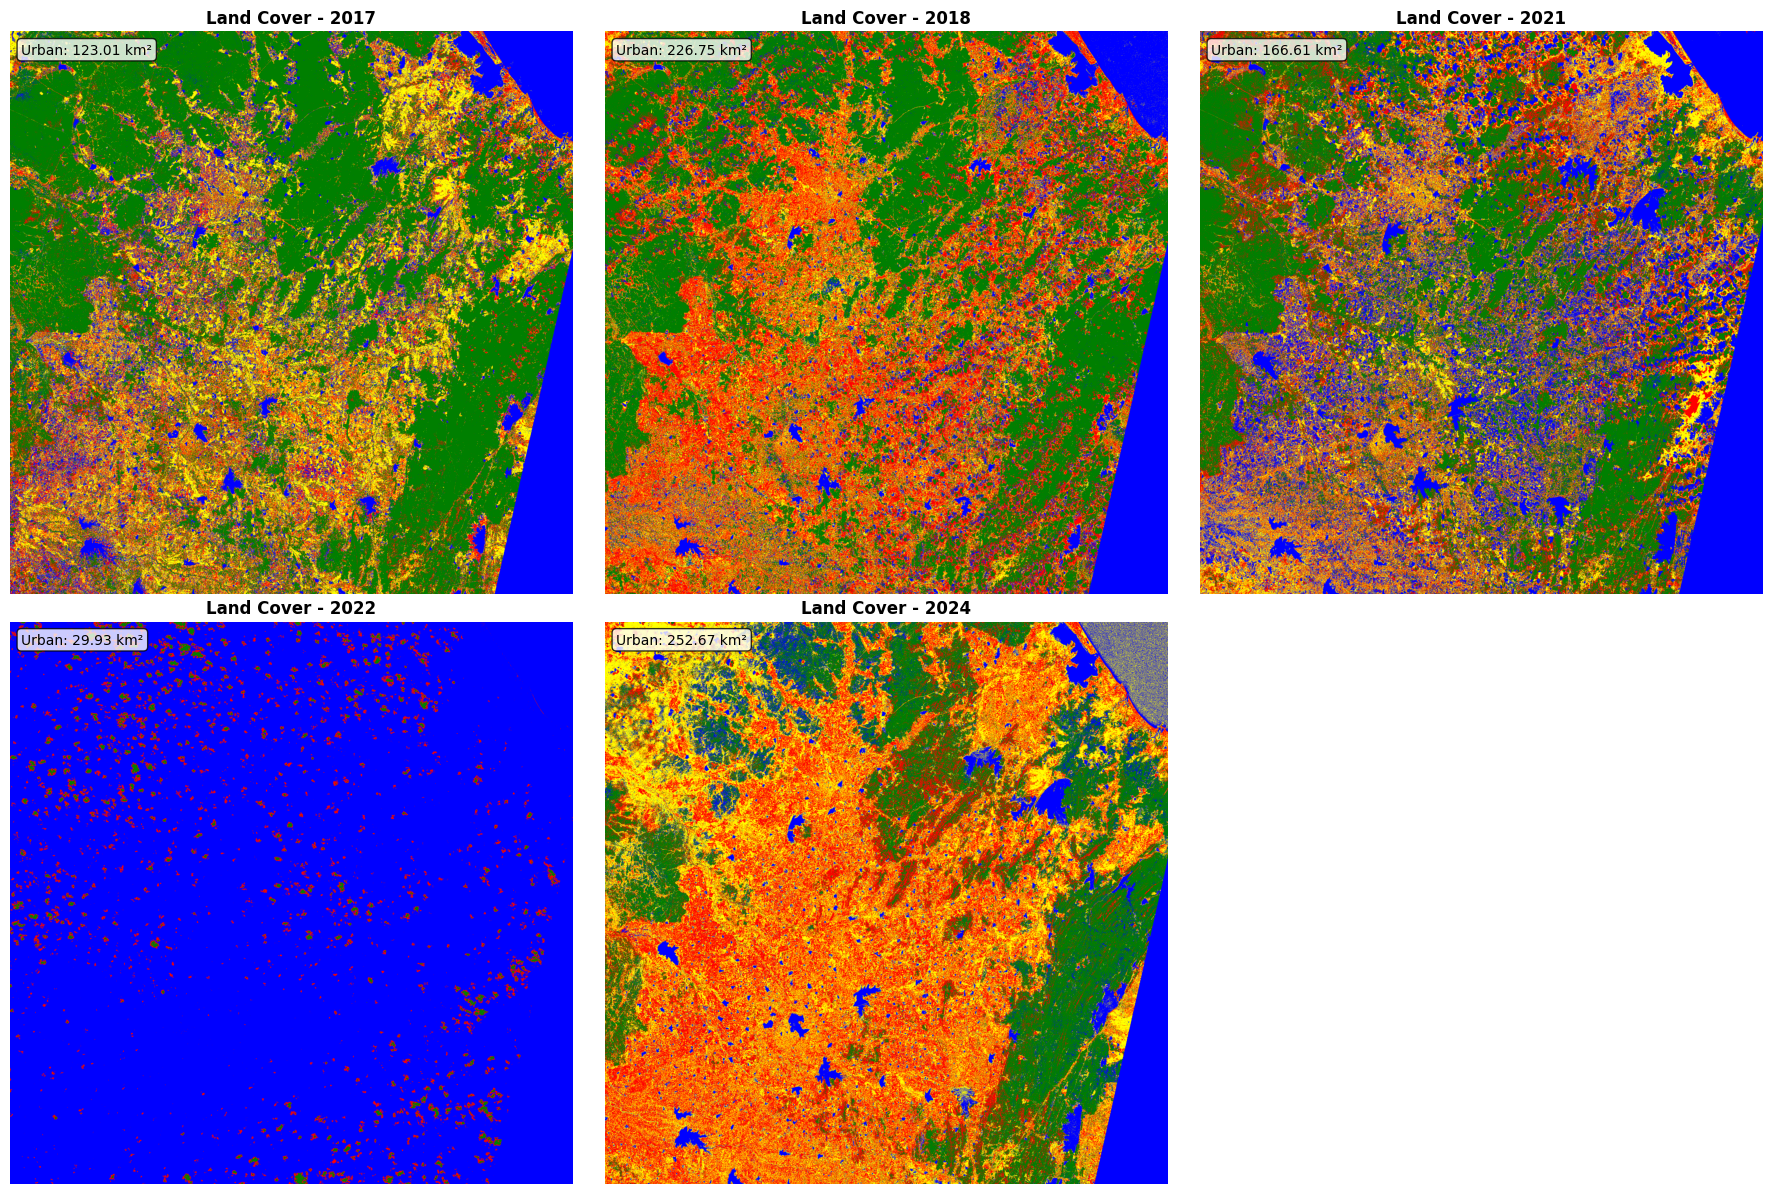

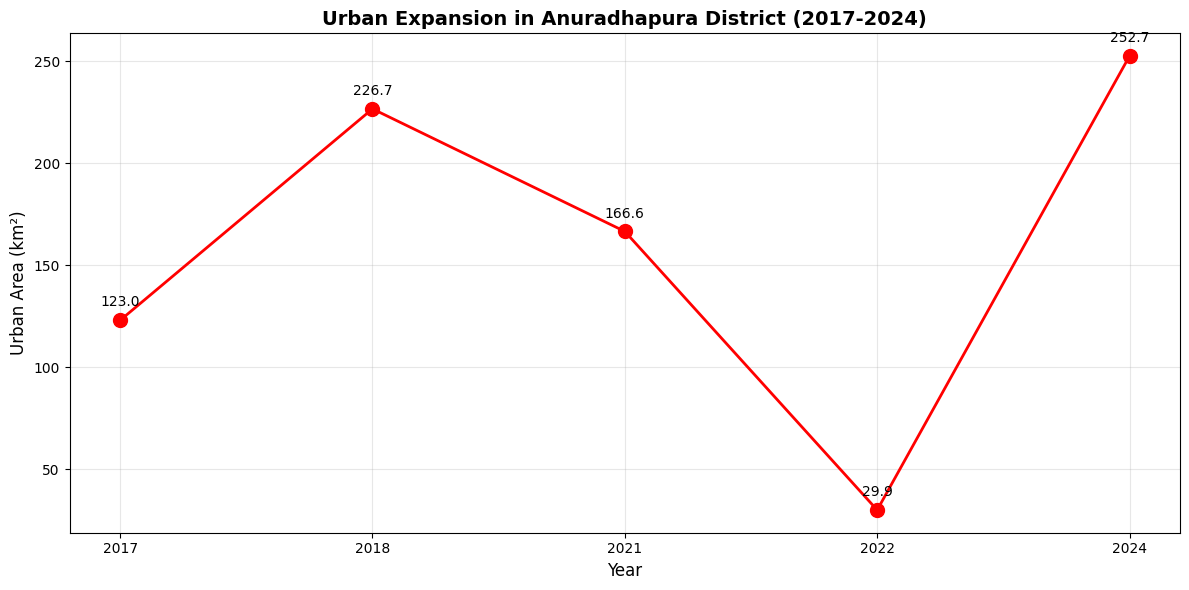

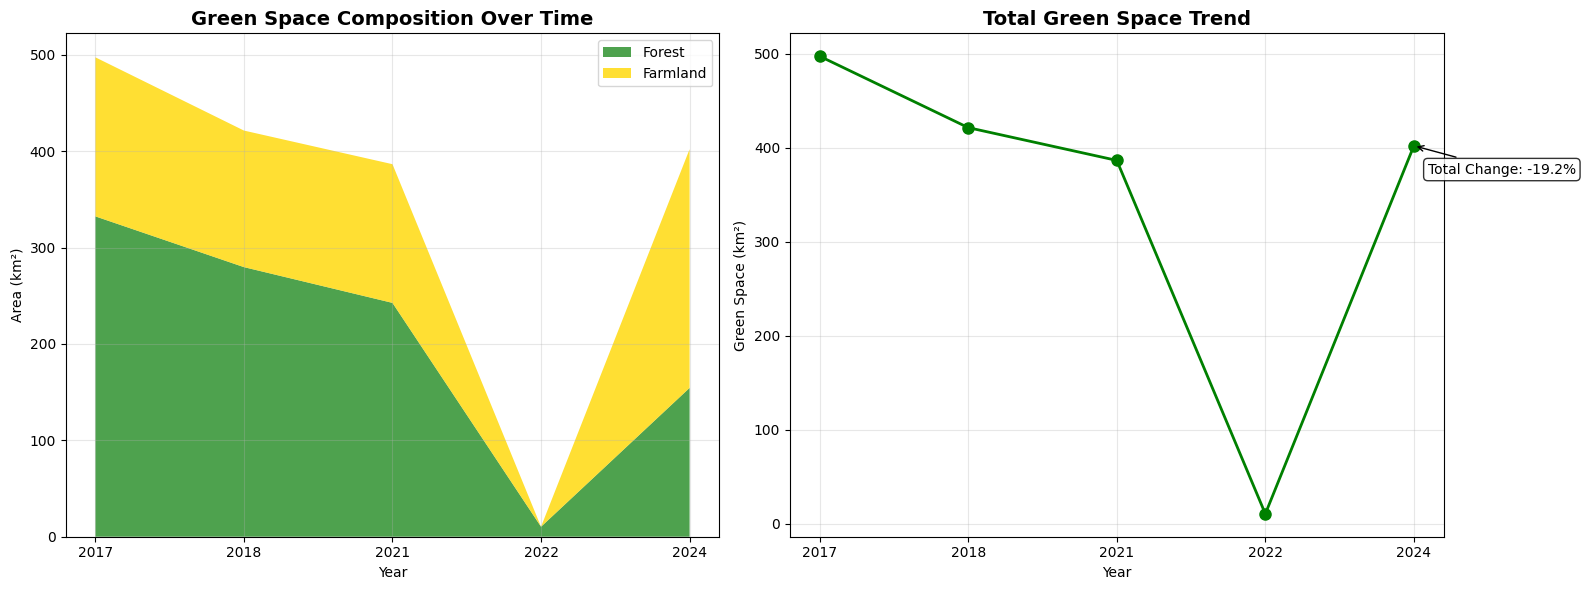


=== Green Space Analysis Results ===
2017: 497.40 km²
2018: 421.40 km²
2021: 386.51 km²
2022: 10.33 km²
2024: 402.08 km²

Total Change: -19.16%

=== Change Detection Analysis ===

2017 → 2018:
  Forest: -52.65 km² (-15.8%)
  Farmland: -23.35 km² (-14.1%)
  Urban: +103.73 km² (+84.3%)
  Water: -27.74 km² (-20.8%)

2018 → 2021:
  Forest: -37.11 km² (-13.3%)
  Farmland: +2.21 km² (+1.6%)
  Urban: -60.13 km² (-26.5%)
  Water: +95.03 km² (+90.2%)

2021 → 2022:
  Forest: -232.27 km² (-95.7%)
  Urban: -136.68 km² (-82.0%)
  Water: +512.85 km² (+255.9%)

2022 → 2024:
  Forest: +144.06 km² (+1394.1%)
  Urban: +222.73 km² (+744.1%)
  Water: -614.48 km² (-86.2%)


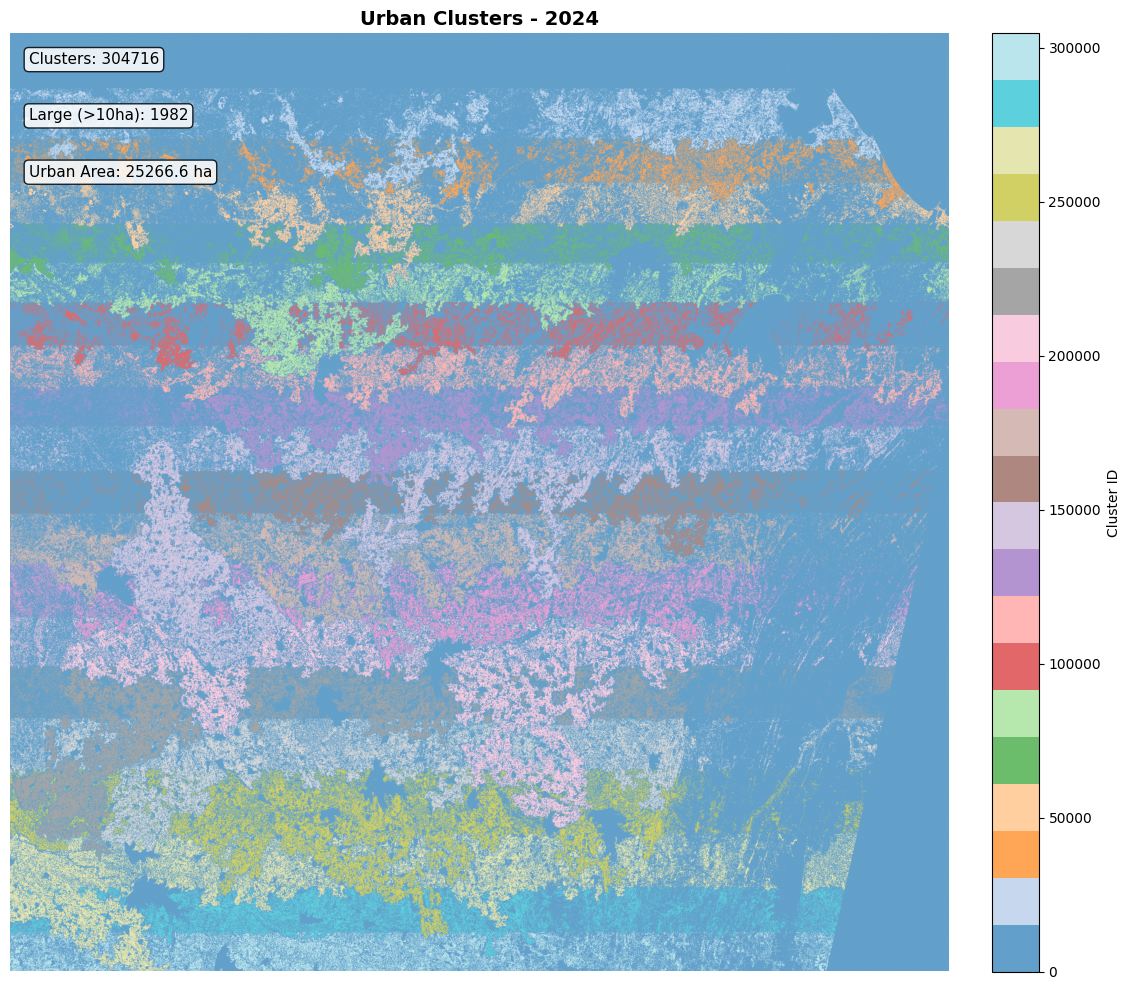


MULTI-TEMPORAL ANALYSIS SUMMARY REPORT

Study Period: 2017 - 2024
Study Area: Anuradhapura District, Sri Lanka

Years Analyzed: 2017, 2018, 2021, 2022, 2024

--- URBAN EXPANSION ---
Initial Urban Area (2017): 123.01 km²
Final Urban Area (2024): 252.67 km²
Net Change: +129.66 km² (+105.4%)

--- GREEN SPACE LOSS ---
Total Green Space Change: -19.16%
Forest Change: -177.97 km²
Farmland Change: +82.65 km²

--- RECOMMENDATIONS ---
1. Implement green buffer zones around expanding urban areas
2. Protect remaining forest patches through conservation policies
3. Promote sustainable urban development with green infrastructure
4. Monitor high-growth clusters for environmental impact
5. Establish urban growth boundaries to preserve agricultural land

All outputs saved to: /content/drive/MyDrive/Geo_Data/Geo_Task_04_Data


In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import ndimage
import warnings
warnings.filterwarnings('ignore')

# Base directory
BASE_DIR = "/content/drive/MyDrive/Geo_Data/Geo_Task_04_Data"

# Define years and corresponding data paths
YEARS = ['2017', '2018', '2021', '2022', '2024']

# Update these paths according to your Sentinel-2 data structure
DATA_PATHS = {
    '2017': {
        'red': f"{BASE_DIR}/S2A_MSIL2A_20171117T050101_N0500_R119_T44PMQ_20230823T011826.SAFE/GRANULE/L2A_T44PMQ_A012557_20171117T051014/IMG_DATA/R10m/T44PMQ_20171117T050101_B04_10m.jp2",  # Update path
        'nir': f"{BASE_DIR}/S2A_MSIL2A_20171117T050101_N0500_R119_T44PMQ_20230823T011826.SAFE/GRANULE/L2A_T44PMQ_A012557_20171117T051014/IMG_DATA/R10m/T44PMQ_20171117T050101_B08_10m.jp2"   # Update path
    },
    '2018': {
        'red': f"{BASE_DIR}/S2B_MSIL2A_20180220T045829_N0500_R119_T44PMQ_20230903T100504.SAFE/GRANULE/L2A_T44PMQ_A005007_20180220T050729/IMG_DATA/R10m/T44PMQ_20180220T045829_B04_10m.jp2",
        'nir': f"{BASE_DIR}/S2B_MSIL2A_20180220T045829_N0500_R119_T44PMQ_20230903T100504.SAFE/GRANULE/L2A_T44PMQ_A005007_20180220T050729/IMG_DATA/R10m/T44PMQ_20180220T045829_B08_10m.jp2"
    },
    '2021': {
        'red': f"{BASE_DIR}/S2B_MSIL2A_20210125T050059_N0500_R119_T44PMQ_20230523T010339.SAFE/GRANULE/L2A_T44PMQ_A020308_20210125T050922/IMG_DATA/R10m/T44PMQ_20210125T050059_B04_10m.jp2",
        'nir': f"{BASE_DIR}/S2B_MSIL2A_20210125T050059_N0500_R119_T44PMQ_20230523T010339.SAFE/GRANULE/L2A_T44PMQ_A020308_20210125T050922/IMG_DATA/R10m/T44PMQ_20210125T050059_B08_10m.jp2"
    },
    '2022': {
        'red': f"{BASE_DIR}/S2B_MSIL2A_20221027T045909_N0510_R119_T44PMQ_20240720T105108.SAFE/GRANULE/L2A_T44PMQ_A029460_20221027T051342/IMG_DATA/R10m/T44PMQ_20221027T045909_B04_10m.jp2",
        'nir': f"{BASE_DIR}/S2B_MSIL2A_20221027T045909_N0510_R119_T44PMQ_20240720T105108.SAFE/GRANULE/L2A_T44PMQ_A029460_20221027T051342/IMG_DATA/R10m/T44PMQ_20221027T045909_B04_10m.jp2"
    },
    '2024': {
        'red': f"{BASE_DIR}/S2B_MSIL2A_20240310T045649_N0510_R119_T44PMQ_20240310T074109.SAFE/GRANULE/L2A_T44PMQ_A036610_20240310T051331/IMG_DATA/R10m/T44PMQ_20240310T045649_B04_10m.jp2",
        'nir': f"{BASE_DIR}/S2B_MSIL2A_20240310T045649_N0510_R119_T44PMQ_20240310T074109.SAFE/GRANULE/L2A_T44PMQ_A036610_20240310T051331/IMG_DATA/R10m/T44PMQ_20240310T045649_B08_10m.jp2"
    }
}


# Training data path
TRAINING_DATA_PATH = "/content/drive/MyDrive/Geo_Data/Geo_Task_04_Data/training_anuradhapura.geojson"

# Output directory
OUTPUT_DIR = "/content/drive/MyDrive/Geo_Data/Geo_Task_04_Data"

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Output directory created: {OUTPUT_DIR}")

# ============================================================================
# CELL 01: LOAD STUDY AREA
# ============================================================================

print("Loading study area boundaries...")
gadm = gpd.read_file(f"{BASE_DIR}/gadm41_LKA_shp/gadm41_LKA_1.shp")
anuradhapura = gadm[gadm['NAME_1'].str.contains("Anuradhapura", case=False, na=False)]
gadm = gadm.to_crs("EPSG:4326")
anuradhapura = anuradhapura.to_crs("EPSG:4326")

# Create study area visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
gadm.plot(ax=axes[0], color="lightgray", edgecolor="black", alpha=0.7)
anuradhapura.plot(ax=axes[0], edgecolor="red", facecolor="red", alpha=0.3, linewidth=2)
axes[0].set_title("Sri Lanka with Anuradhapura District", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")
axes[0].grid(True, alpha=0.3)

anuradhapura.boundary.plot(ax=axes[1], color='red', linewidth=2)
axes[1].set_title("Study Area: Anuradhapura District", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/study_area_map.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Study Area: Anuradhapura District")
print(f"Approximate Area: ~7,179 km²")

# ============================================================================
# CELL 02: ANALYZER CLASS
# ============================================================================

class UrbanExpansionAnalyzer:
    def __init__(self, study_area_gdf):
        self.study_area = study_area_gdf
        self.results = {}
        self.classified_rasters = {}
        self.ndvi_data = {}

    def calculate_land_cover_statistics(self, classified_raster, year):
        """Calculate land cover statistics"""
        unique, counts = np.unique(classified_raster, return_counts=True)
        total_pixels = np.sum(counts)

        stats = {}
        class_names = {1: 'Forest', 2: 'Farmland', 3: 'Urban', 4: 'Water'}

        for class_id, count in zip(unique, counts):
            if class_id in class_names:
                area_km2 = (count * 100) / 1e6  # 10m resolution
                percentage = (count / total_pixels) * 100
                stats[class_names[class_id]] = {
                    'area_km2': area_km2,
                    'percentage': percentage,
                    'pixel_count': count
                }

        self.results[year] = stats
        return stats

    def compute_change_analysis(self, year1, year2):
        """Compute change between two years"""
        if year1 not in self.results or year2 not in self.results:
            print(f"Missing data for {year1} or {year2}")
            return None

        stats1 = self.results[year1]
        stats2 = self.results[year2]
        change_matrix = {}

        for lc in ['Forest', 'Farmland', 'Urban', 'Water']:
            if lc in stats1 and lc in stats2:
                area_change = stats2[lc]['area_km2'] - stats1[lc]['area_km2']
                percent_change = (area_change / stats1[lc]['area_km2']) * 100 if stats1[lc]['area_km2'] > 0 else 0

                change_matrix[lc] = {
                    'area_change_km2': area_change,
                    'percent_change': percent_change,
                    'initial_area': stats1[lc]['area_km2'],
                    'final_area': stats2[lc]['area_km2']
                }

        return change_matrix

analyzer = UrbanExpansionAnalyzer(anuradhapura)

# ============================================================================
# CELL 03: OPTIMIZED CLASSIFICATION FUNCTION
# ============================================================================

def optimized_land_cover_classification(red_path, nir_path, training_data_path,
                                        output_path, year, use_existing_model=None):
    """
    Memory-efficient classification with optimized Random Forest
    """
    print(f"\n{'='*60}")
    print(f"Processing Year: {year}")
    print(f"{'='*60}")

    # Load imagery
    print("Loading satellite imagery...")
    with rasterio.open(red_path) as red_src, rasterio.open(nir_path) as nir_src:
        red = red_src.read(1).astype('float32')
        nir = nir_src.read(1).astype('float32')
        profile = red_src.profile
        transform = red_src.transform
        crs = red_src.crs

    # Calculate NDVI
    print("Calculating NDVI...")
    ndvi = np.where(
        (nir + red) == 0, 0,
        (nir- red) / (nir + red + 1e-8)
    )
    ndvi = np.clip(ndvi, -1, 1)

    # Feature stack
    feature_stack = np.dstack([red, nir, ndvi])
    rows, cols, n_features = feature_stack.shape
    X = feature_stack.reshape(rows * cols, n_features)

    # Train model (only if not provided)
    if use_existing_model is None:
        print("Training Random Forest model...")
        train_gdf = gpd.read_file(training_data_path).to_crs(crs)

        train_raster = rasterize(
            [(geom, value) for geom, value in zip(train_gdf.geometry, train_gdf['class'])],
            out_shape=(rows, cols),
            transform=transform,
            fill=0,
            dtype='uint8'
        )

        mask = train_raster > 0
        X_train = X[mask.flatten()]
        y_train = train_raster[mask]

        X_tr, X_te, y_tr, y_te = train_test_split(
            X_train, y_train, test_size=0.25, random_state=42, stratify=y_train
        )

        # HIGHLY OPTIMIZED Random Forest - prioritizing speed for green space analysis
        rf_classifier = RandomForestClassifier(
            n_estimators=30,           # Minimal trees for speed (was 50)
            max_depth=8,               # Shallow trees = faster (was 12)
            min_samples_split=50,      # Larger splits = fewer nodes (was 20)
            min_samples_leaf=20,       # Larger leaves = simpler trees (was 10)
            max_features='sqrt',       # Feature sampling
            n_jobs=-1,                 # Use all CPU cores
            random_state=42,
            max_samples=0.5,           # Sample only 50% per tree (was 0.7)
            bootstrap=True,            # Faster than bagging
            oob_score=False,           # Skip out-of-bag scoring
            verbose=0,
            class_weight='balanced'    # Handle class imbalance efficiently
        )

        rf_classifier.fit(X_tr, y_tr)

        # Accuracy assessment
        y_pred = rf_classifier.predict(X_te)
        accuracy = accuracy_score(y_te, y_pred)

        print(f"Classification Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_te, y_pred,
                                   target_names=['Forest', 'Farmland', 'Urban', 'Water'],
                                   zero_division=0))

        # Confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_te, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Forest', 'Farmland', 'Urban', 'Water'],
                   yticklabels=['Forest', 'Farmland', 'Urban', 'Water'])
        plt.title(f'Confusion Matrix - {year}')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.tight_layout()
        plt.savefig(f'{OUTPUT_DIR}/confusion_matrix_{year}.png', dpi=300, bbox_inches='tight')
        plt.show()
    else:
        rf_classifier = use_existing_model
        accuracy = None

    # Block-wise prediction for memory efficiency
    print("Classifying full scene...")
    predicted = np.zeros(rows * cols, dtype='uint8')
    block_size = 10000  # Larger blocks = faster (was 5000)

    for i in range(0, len(X), block_size):
        end_idx = min(i + block_size, len(X))
        predicted[i:end_idx] = rf_classifier.predict(X[i:end_idx])
        if (i // block_size) % 5 == 0:  # Update every 5 blocks (was 10)
            progress = (i / len(X)) * 100
            print(f"Progress: {progress:.1f}%", end='\r')

    print("Progress: 100.0%")
    classified_raster = predicted.reshape(rows, cols)

    # Save classified raster
    profile.update({'dtype': 'uint8', 'count': 1, 'compress': 'LZW'})
    with rasterio.open(output_path, 'w', **profile) as dst:
        dst.write(classified_raster, 1)

    print(f"Classification complete! Saved to: {output_path}")

    return classified_raster, accuracy, rf_classifier, transform, crs, ndvi

# ============================================================================
# CELL 04: PROCESS ALL YEARS (FIXED)
# ============================================================================

print("\n" + "="*60)
print("STARTING MULTI-TEMPORAL CLASSIFICATION")
print("="*60)

trained_model = None  # Reuse model across years for speed

for year in YEARS:
    print(f"\nProcessing {year}...")

    classified, acc, model, trans, proj, ndvi = optimized_land_cover_classification(
        red_path=DATA_PATHS[year]['red'],
        nir_path=DATA_PATHS[year]['nir'],
        training_data_path=TRAINING_DATA_PATH,
        output_path=f"{OUTPUT_DIR}/classified_anuradhapura_{year}.tif",
        year=year,
        use_existing_model=trained_model  # Reuse model after first year
    )

    # Store results (downsample for memory efficiency)
    downsample_factor = 4  # Reduce resolution by 4x for visualization
    analyzer.classified_rasters[year] = classified[::downsample_factor, ::downsample_factor]
    analyzer.ndvi_data[year] = ndvi[::downsample_factor, ::downsample_factor]

    # Calculate statistics BEFORE clearing memory
    stats = analyzer.calculate_land_cover_statistics(analyzer.classified_rasters[year], year)

    print(f"\n=== Land Cover Statistics for {year} ===")
    for lc, metrics in stats.items():
        print(f"{lc}: {metrics['area_km2']:.2f} km² ({metrics['percentage']:.2f}%)")

    # Clear memory - only delete variables that exist in this scope
    del classified, ndvi
    import gc
    gc.collect()

    # Save model after first year for reuse
    if trained_model is None and model is not None:
        trained_model = model
        saved_transform = trans
        saved_crs = proj

print("\n" + "="*60)
print("ALL CLASSIFICATIONS COMPLETE!")
print("="*60)

# ============================================================================
# CELL 05: MULTI-TEMPORAL NDVI VISUALIZATION
# ============================================================================

def visualize_multi_temporal_ndvi(ndvi_dict, years):
    """Visualize NDVI across all years - memory optimized"""
    n_years = len(years)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Reduced from 18x12
    axes = axes.flatten()

    ndvi_stats = {}

    for idx, year in enumerate(years):
        if year in ndvi_dict:
            ndvi = ndvi_dict[year]

            # Further downsample if still too large
            if ndvi.shape[0] > 2000 or ndvi.shape[1] > 2000:
                ndvi = ndvi[::2, ::2]

            mask = (ndvi != 0) & (ndvi >= -1) & (ndvi <= 1)
            ndvi_valid = ndvi[mask]

            if len(ndvi_valid) > 0:
                ndvi_stats[year] = {
                    'mean': float(np.mean(ndvi_valid)),
                    'median': float(np.median(ndvi_valid)),
                    'std': float(np.std(ndvi_valid)),
                    'green_area_km2': float(np.sum(ndvi_valid > 0.3) * 400 / 1e6)  # Adjusted for downsampling
                }
            else:
                ndvi_stats[year] = {'mean': 0, 'median': 0, 'std': 0, 'green_area_km2': 0}

            # Use interpolation for smoother display
            im = axes[idx].imshow(ndvi, cmap='RdYlGn', vmin=-0.5, vmax=0.8, interpolation='bilinear')
            axes[idx].set_title(f'NDVI - {year}', fontsize=11, fontweight='bold')
            axes[idx].axis('off')
            plt.colorbar(im, ax=axes[idx], fraction=0.046, pad=0.04)

            # Add stats
            axes[idx].text(0.02, 0.98,
                          f'Mean: {ndvi_stats[year]["mean"]:.3f}\nGreen: {ndvi_stats[year]["green_area_km2"]:.1f} km²',
                          transform=axes[idx].transAxes, fontsize=8,
                          bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                          verticalalignment='top')

            # Clear memory after each plot
            del ndvi, mask, ndvi_valid

    # Hide extra subplots
    for idx in range(n_years, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/multi_temporal_ndvi.png', dpi=200, bbox_inches='tight')  # Reduced DPI
    plt.close(fig)  # Close figure to free memory

    return ndvi_stats

ndvi_stats = visualize_multi_temporal_ndvi(analyzer.ndvi_data, YEARS)

# ============================================================================
# CELL 06: URBAN EXPANSION VISUALIZATION
# ============================================================================

def visualize_urban_expansion(classified_dict, years):
    """Visualize land cover change over time"""
    n_years = len(years)
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    urban_areas = []

    for idx, year in enumerate(years):
        if year in classified_dict:
            classified = classified_dict[year]

            # RGB visualization
            rgb = np.zeros((classified.shape[0], classified.shape[1], 3))
            rgb[classified == 1] = [0, 0.5, 0]    # Forest
            rgb[classified == 2] = [1, 1, 0]      # Farmland
            rgb[classified == 3] = [1, 0, 0]      # Urban
            rgb[classified == 4] = [0, 0, 1]      # Water

            axes[idx].imshow(rgb)
            axes[idx].set_title(f'Land Cover - {year}', fontsize=12, fontweight='bold')
            axes[idx].axis('off')

            urban_area = (np.sum(classified == 3) * 100) / 1e6
            urban_areas.append(urban_area)

            axes[idx].text(0.02, 0.98, f'Urban: {urban_area:.2f} km²',
                          transform=axes[idx].transAxes, fontsize=10,
                          bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                          verticalalignment='top')

    # Hide extra subplots
    for idx in range(n_years, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/urban_expansion_timeline.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Urban growth trend
    plt.figure(figsize=(12, 6))
    plt.plot(years, urban_areas, 'ro-', linewidth=2, markersize=10)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Urban Area (km²)', fontsize=12)
    plt.title('Urban Expansion in Anuradhapura District (2017-2024)',
              fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

    for year, area in zip(years, urban_areas):
        plt.annotate(f'{area:.1f}', (year, area),
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/urban_growth_trend.png', dpi=300, bbox_inches='tight')
    plt.show()

    return urban_areas

urban_areas = visualize_urban_expansion(analyzer.classified_rasters, YEARS)

# ============================================================================
# CELL 07: GREEN SPACE ANALYSIS
# ============================================================================

def analyze_green_space_loss(land_cover_stats, years):
    """Analyze green space changes"""
    green_areas = []
    forest_areas = []
    farmland_areas = []

    for year in years:
        if year in land_cover_stats:
            stats = land_cover_stats[year]
            forest = stats.get('Forest', {}).get('area_km2', 0)
            farmland = stats.get('Farmland', {}).get('area_km2', 0)

            green_areas.append(forest + farmland)
            forest_areas.append(forest)
            farmland_areas.append(farmland)

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Stacked area
    ax1.stackplot(years, forest_areas, farmland_areas,
                 labels=['Forest', 'Farmland'],
                 colors=['#228B22', '#FFD700'], alpha=0.8)
    ax1.set_title('Green Space Composition Over Time', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Area (km²)')
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)

    # Trend line
    ax2.plot(years, green_areas, 'g-o', linewidth=2, markersize=8)
    ax2.set_title('Total Green Space Trend', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Green Space (km²)')
    ax2.grid(True, alpha=0.3)

    if len(green_areas) > 1:
        pct_change = ((green_areas[-1] - green_areas[0]) / green_areas[0]) * 100
        ax2.annotate(f'Total Change: {pct_change:+.1f}%',
                    xy=(years[-1], green_areas[-1]),
                    xytext=(10, -20), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/green_space_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    return {
        'years': years,
        'green_areas': green_areas,
        'forest_areas': forest_areas,
        'farmland_areas': farmland_areas,
        'total_change_percent': pct_change if len(green_areas) > 1 else 0
    }

green_results = analyze_green_space_loss(analyzer.results, YEARS)

print("\n=== Green Space Analysis Results ===")
for year, green in zip(green_results['years'], green_results['green_areas']):
    print(f"{year}: {green:.2f} km²")
print(f"\nTotal Change: {green_results['total_change_percent']:+.2f}%")

# ============================================================================
# CELL 08: CHANGE DETECTION MATRIX
# ============================================================================

print("\n=== Change Detection Analysis ===")
for i in range(len(YEARS)-1):
    year1, year2 = YEARS[i], YEARS[i+1]
    changes = analyzer.compute_change_analysis(year1, year2)

    if changes:
        print(f"\n{year1} → {year2}:")
        for lc, metrics in changes.items():
            print(f"  {lc}: {metrics['area_change_km2']:+.2f} km² ({metrics['percent_change']:+.1f}%)")

# ============================================================================
# CELL 09: SPATIAL PATTERN ANALYSIS
# ============================================================================

def spatial_pattern_analysis(classified_raster, year):
    """Analyze urban spatial patterns"""
    urban_mask = (classified_raster == 3).astype(int)
    urban_count = np.sum(urban_mask)

    if urban_count == 0:
        print(f"No urban areas detected in {year}")
        return None

    labeled, num_clusters = ndimage.label(urban_mask)
    cluster_sizes = ndimage.sum(urban_mask, labeled, range(1, num_clusters + 1))

    plt.figure(figsize=(12, 10))
    plt.imshow(labeled, cmap='tab20', alpha=0.7)
    plt.title(f'Urban Clusters - {year}', fontsize=14, fontweight='bold')
    plt.colorbar(label='Cluster ID', fraction=0.046, pad=0.04)
    plt.axis('off')

    total_urban_ha = urban_count * 100 / 1e4
    large_clusters = np.sum(np.array(cluster_sizes) > 100)

    info = [
        f'Clusters: {num_clusters}',
        f'Large (>10ha): {large_clusters}',
        f'Urban Area: {total_urban_ha:.1f} ha'
    ]

    for i, text in enumerate(info):
        plt.text(0.02, 0.98 - (i * 0.06), text,
                transform=plt.gca().transAxes, fontsize=11,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.85),
                verticalalignment='top')

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/urban_clusters_{year}.png', dpi=300, bbox_inches='tight')
    plt.show()

    return {
        'num_clusters': num_clusters,
        'total_urban_ha': total_urban_ha,
        'large_clusters': large_clusters
    }

# Analyze spatial patterns for latest year
spatial_results = spatial_pattern_analysis(analyzer.classified_rasters['2024'], '2024')

# ============================================================================
# CELL 10: SUMMARY REPORT
# ============================================================================

print("\n" + "="*60)
print("MULTI-TEMPORAL ANALYSIS SUMMARY REPORT")
print("="*60)
print(f"\nStudy Period: {YEARS[0]} - {YEARS[-1]}")
print(f"Study Area: Anuradhapura District, Sri Lanka")
print(f"\nYears Analyzed: {', '.join(YEARS)}")

print("\n--- URBAN EXPANSION ---")
if len(urban_areas) > 1:
    urban_change = urban_areas[-1] - urban_areas[0]
    urban_pct = (urban_change / urban_areas[0]) * 100
    print(f"Initial Urban Area ({YEARS[0]}): {urban_areas[0]:.2f} km²")
    print(f"Final Urban Area ({YEARS[-1]}): {urban_areas[-1]:.2f} km²")
    print(f"Net Change: {urban_change:+.2f} km² ({urban_pct:+.1f}%)")

print("\n--- GREEN SPACE LOSS ---")
print(f"Total Green Space Change: {green_results['total_change_percent']:+.2f}%")
print(f"Forest Change: {green_results['forest_areas'][-1] - green_results['forest_areas'][0]:+.2f} km²")
print(f"Farmland Change: {green_results['farmland_areas'][-1] - green_results['farmland_areas'][0]:+.2f} km²")

print("\n" + "="*60)
print(f"All outputs saved to: {OUTPUT_DIR}")
print("="*60)

### Remove modular cording past into cells and run separatly

In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import ndimage
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# ============================================================================
# CELL 01: CONFIGURATION
# ============================================================================

# Base directory
BASE_DIR = "/content/drive/MyDrive/Geo_Data/Geo_Task_04_Data"

# Define years
YEARS = ['2017', '2018', '2021', '2022', '2024']

# Data paths
DATA_PATHS = {
    '2017': {
        'red': f"{BASE_DIR}/S2A_MSIL2A_20171117T050101_N0500_R119_T44PMQ_20230823T011826.SAFE/GRANULE/L2A_T44PMQ_A012557_20171117T051014/IMG_DATA/R10m/T44PMQ_20171117T050101_B04_10m.jp2",
        'nir': f"{BASE_DIR}/S2A_MSIL2A_20171117T050101_N0500_R119_T44PMQ_20230823T011826.SAFE/GRANULE/L2A_T44PMQ_A012557_20171117T051014/IMG_DATA/R10m/T44PMQ_20171117T050101_B08_10m.jp2"
    },
    '2018': {
        'red': f"{BASE_DIR}/S2B_MSIL2A_20180220T045829_N0500_R119_T44PMQ_20230903T100504.SAFE/GRANULE/L2A_T44PMQ_A005007_20180220T050729/IMG_DATA/R10m/T44PMQ_20180220T045829_B04_10m.jp2",
        'nir': f"{BASE_DIR}/S2B_MSIL2A_20180220T045829_N0500_R119_T44PMQ_20230903T100504.SAFE/GRANULE/L2A_T44PMQ_A005007_20180220T050729/IMG_DATA/R10m/T44PMQ_20180220T045829_B08_10m.jp2"
    },
    '2021': {
        'red': f"{BASE_DIR}/S2B_MSIL2A_20210125T050059_N0500_R119_T44PMQ_20230523T010339.SAFE/GRANULE/L2A_T44PMQ_A020308_20210125T050922/IMG_DATA/R10m/T44PMQ_20210125T050059_B04_10m.jp2",
        'nir': f"{BASE_DIR}/S2B_MSIL2A_20210125T050059_N0500_R119_T44PMQ_20230523T010339.SAFE/GRANULE/L2A_T44PMQ_A020308_20210125T050922/IMG_DATA/R10m/T44PMQ_20210125T050059_B08_10m.jp2"
    },
    '2022': {
        'red': f"{BASE_DIR}/S2B_MSIL2A_20221027T045909_N0510_R119_T44PMQ_20240720T105108.SAFE/GRANULE/L2A_T44PMQ_A029460_20221027T051342/IMG_DATA/R10m/T44PMQ_20221027T045909_B04_10m.jp2",
        'nir': f"{BASE_DIR}/S2B_MSIL2A_20221027T045909_N0510_R119_T44PMQ_20240720T105108.SAFE/GRANULE/L2A_T44PMQ_A029460_20221027T051342/IMG_DATA/R10m/T44PMQ_20221027T045909_B04_10m.jp2"
    },
    '2024': {
        'red': f"{BASE_DIR}/S2B_MSIL2A_20240310T045649_N0510_R119_T44PMQ_20240310T074109.SAFE/GRANULE/L2A_T44PMQ_A036610_20240310T051331/IMG_DATA/R10m/T44PMQ_20240310T045649_B04_10m.jp2",
        'nir': f"{BASE_DIR}/S2B_MSIL2A_20240310T045649_N0510_R119_T44PMQ_20240310T074109.SAFE/GRANULE/L2A_T44PMQ_A036610_20240310T051331/IMG_DATA/R10m/T44PMQ_20240310T045649_B08_10m.jp2"
    }
}

# Training data path
TRAINING_DATA_PATH = "/content/drive/MyDrive/Geo_Data/Geo_Task_04_Data/training_anuradhapura.geojson"

# Output directory
OUTPUT_DIR = "/content/drive/MyDrive/Geo_Data/Geo_Task_04_Data"
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Output directory: {OUTPUT_DIR}")

In [ ]:
# ============================================================================
# CELL 02: LOAD STUDY AREA
# ============================================================================

print("Loading study area boundaries...")
gadm = gpd.read_file(f"{BASE_DIR}/gadm41_LKA_shp/gadm41_LKA_1.shp")
anuradhapura = gadm[gadm['NAME_1'].str.contains("Anuradhapura", case=False, na=False)]
gadm = gadm.to_crs("EPSG:4326")
anuradhapura = anuradhapura.to_crs("EPSG:4326")

# Visualize study area
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
gadm.plot(ax=axes[0], color="lightgray", edgecolor="black", alpha=0.7)
anuradhapura.plot(ax=axes[0], edgecolor="red", facecolor="red", alpha=0.3, linewidth=2)
axes[0].set_title("Sri Lanka with Anuradhapura District", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")
axes[0].grid(True, alpha=0.3)

anuradhapura.boundary.plot(ax=axes[1], color='red', linewidth=2)
axes[1].set_title("Study Area: Anuradhapura District", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/study_area_map.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Study Area: Anuradhapura District")
print(f"Approximate Area: ~7,179 km²")

In [ ]:
# ============================================================================
# CELL 03: INITIALIZE STORAGE DICTIONARIES
# ============================================================================

# Storage for results
all_results = {}
classified_rasters = {}
ndvi_data = {}
trained_model = None

print("Storage initialized for multi-temporal analysis")

In [ ]:
# ============================================================================
# CELL 04: DEFINE HELPER FUNCTIONS
# ============================================================================

def calculate_land_cover_statistics(classified_raster, year):
    """Calculate land cover statistics for a given year"""
    unique, counts = np.unique(classified_raster, return_counts=True)
    total_pixels = np.sum(counts)

    stats = {}
    class_names = {1: 'Forest', 2: 'Farmland', 3: 'Urban', 4: 'Water'}

    for class_id, count in zip(unique, counts):
        if class_id in class_names:
            area_km2 = (count * 100) / 1e6  # 10m resolution
            percentage = (count / total_pixels) * 100
            stats[class_names[class_id]] = {
                'area_km2': area_km2,
                'percentage': percentage,
                'pixel_count': count
            }

    return stats


def compute_change_analysis(results_dict, year1, year2):
    """Compute change between two years"""
    if year1 not in results_dict or year2 not in results_dict:
        print(f"Missing data for {year1} or {year2}")
        return None

    stats1 = results_dict[year1]
    stats2 = results_dict[year2]
    change_matrix = {}

    for lc in ['Forest', 'Farmland', 'Urban', 'Water']:
        if lc in stats1 and lc in stats2:
            area_change = stats2[lc]['area_km2'] - stats1[lc]['area_km2']
            percent_change = (area_change / stats1[lc]['area_km2']) * 100 if stats1[lc]['area_km2'] > 0 else 0

            change_matrix[lc] = {
                'area_change_km2': area_change,
                'percent_change': percent_change,
                'initial_area': stats1[lc]['area_km2'],
                'final_area': stats2[lc]['area_km2']
            }

    return change_matrix

print("Helper functions defined")

In [ ]:
# ============================================================================
# CELL 05: CLASSIFICATION FUNCTION
# ============================================================================

def classify_land_cover(red_path, nir_path, training_data_path, output_path,
                       year, use_existing_model=None):
    """
    Memory-efficient land cover classification
    """
    print(f"\n{'='*60}")
    print(f"Processing Year: {year}")
    print(f"{'='*60}")

    # Load imagery
    print("Loading satellite imagery...")
    with rasterio.open(red_path) as red_src, rasterio.open(nir_path) as nir_src:
        red_band = red_src.read(1).astype('float32')
        nir_band = nir_src.read(1).astype('float32')
        profile = red_src.profile
        transform = red_src.transform
        crs = red_src.crs

    # Calculate NDVI
    print("Calculating NDVI...")
    ndvi = np.where(
        (nir_band + red_band) == 0, 0,
        (nir_band - red_band) / (nir_band + red_band + 1e-8)
    )
    ndvi = np.clip(ndvi, -1, 1)

    # Feature stack
    feature_stack = np.dstack([red_band, nir_band, ndvi])
    rows, cols, n_features = feature_stack.shape
    X = feature_stack.reshape(rows * cols, n_features)

    # Train model (only if not provided)
    if use_existing_model is None:
        print("Training Random Forest model...")
        train_gdf = gpd.read_file(training_data_path).to_crs(crs)

        train_raster = rasterize(
            [(geom, value) for geom, value in zip(train_gdf.geometry, train_gdf['class'])],
            out_shape=(rows, cols),
            transform=transform,
            fill=0,
            dtype='uint8'
        )

        mask = train_raster > 0
        X_train = X[mask.flatten()]
        y_train = train_raster[mask]

        X_tr, X_te, y_tr, y_te = train_test_split(
            X_train, y_train, test_size=0.25, random_state=42, stratify=y_train
        )

        # Optimized Random Forest
        rf_classifier = RandomForestClassifier(
            n_estimators=30,
            max_depth=8,
            min_samples_split=50,
            min_samples_leaf=20,
            max_features='sqrt',
            n_jobs=-1,
            random_state=42,
            max_samples=0.5,
            bootstrap=True,
            oob_score=False,
            verbose=0,
            class_weight='balanced'
        )

        rf_classifier.fit(X_tr, y_tr)

        # Accuracy assessment
        y_pred = rf_classifier.predict(X_te)
        accuracy = accuracy_score(y_te, y_pred)

        print(f"Classification Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_te, y_pred,
                                   target_names=['Forest', 'Farmland', 'Urban', 'Water'],
                                   zero_division=0))

        # Confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_te, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Forest', 'Farmland', 'Urban', 'Water'],
                   yticklabels=['Forest', 'Farmland', 'Urban', 'Water'])
        plt.title(f'Confusion Matrix - {year}')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.tight_layout()
        plt.savefig(f'{OUTPUT_DIR}/confusion_matrix_{year}.png', dpi=300, bbox_inches='tight')
        plt.show()
    else:
        rf_classifier = use_existing_model
        accuracy = None

    # Block-wise prediction
    print("Classifying full scene...")
    predicted = np.zeros(rows * cols, dtype='uint8')
    block_size = 10000

    for i in range(0, len(X), block_size):
        end_idx = min(i + block_size, len(X))
        predicted[i:end_idx] = rf_classifier.predict(X[i:end_idx])
        if (i // block_size) % 5 == 0:
            progress = (i / len(X)) * 100
            print(f"Progress: {progress:.1f}%", end='\r')

    print("Progress: 100.0%")
    classified_raster = predicted.reshape(rows, cols)

    # Save classified raster
    profile.update({'dtype': 'uint8', 'count': 1, 'compress': 'LZW'})
    with rasterio.open(output_path, 'w', **profile) as dst:
        dst.write(classified_raster, 1)

    print(f"Classification complete! Saved to: {output_path}")

    return classified_raster, accuracy, rf_classifier, transform, crs, ndvi

print("Classification function defined")

In [ ]:
# ============================================================================
# CELL 06: PROCESS ALL YEARS
# ============================================================================

print("\n" + "="*60)
print("STARTING MULTI-TEMPORAL CLASSIFICATION")
print("="*60)

for year in YEARS:
    print(f"\nProcessing {year}...")

    classified, acc, model, trans, proj, ndvi = classify_land_cover(
        red_path=DATA_PATHS[year]['red'],
        nir_path=DATA_PATHS[year]['nir'],
        training_data_path=TRAINING_DATA_PATH,
        output_path=f"{OUTPUT_DIR}/classified_anuradhapura_{year}.tif",
        year=year,
        use_existing_model=trained_model
    )

    # Store results
    classified_rasters[year] = classified
    ndvi_data[year] = ndvi

    # Calculate statistics
    stats = calculate_land_cover_statistics(classified, year)
    all_results[year] = stats

    print(f"\n=== Land Cover Statistics for {year} ===")
    for lc, metrics in stats.items():
        print(f"{lc}: {metrics['area_km2']:.2f} km² ({metrics['percentage']:.2f}%)")

    # Save model after first year
    if trained_model is None and model is not None:
        trained_model = model

print("\n" + "="*60)
print("ALL CLASSIFICATIONS COMPLETE!")
print("="*60)

In [ ]:
# ============================================================================
# CELL 07: MULTI-TEMPORAL NDVI VISUALIZATION
# ============================================================================

def visualize_ndvi_timeline(ndvi_dict, years):
    """Visualize NDVI across all years"""
    n_years = len(years)
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    ndvi_stats = {}

    for idx, year in enumerate(years):
        if year in ndvi_dict:
            ndvi = ndvi_dict[year]
            mask = ndvi != 0
            ndvi_valid = ndvi[mask]

            ndvi_stats[year] = {
                'mean': np.mean(ndvi_valid),
                'median': np.median(ndvi_valid),
                'std': np.std(ndvi_valid),
                'green_area_km2': np.sum(ndvi_valid > 0.3) * 100 / 1e6
            }

            im = axes[idx].imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
            axes[idx].set_title(f'NDVI - {year}', fontsize=12, fontweight='bold')
            axes[idx].axis('off')
            plt.colorbar(im, ax=axes[idx], fraction=0.046, pad=0.04)

            axes[idx].text(0.02, 0.98,
                          f'Mean: {ndvi_stats[year]["mean"]:.3f}\nGreen: {ndvi_stats[year]["green_area_km2"]:.1f} km²',
                          transform=axes[idx].transAxes, fontsize=9,
                          bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                          verticalalignment='top')

    for idx in range(n_years, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/multi_temporal_ndvi.png', dpi=300, bbox_inches='tight')
    plt.show()

    return ndvi_stats

ndvi_stats = visualize_ndvi_timeline(ndvi_data, YEARS)

In [ ]:
# ============================================================================
# CELL 08: URBAN EXPANSION VISUALIZATION
# ============================================================================

def visualize_urban_timeline(classified_dict, years):
    """Visualize land cover change over time"""
    n_years = len(years)
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    urban_areas = []

    for idx, year in enumerate(years):
        if year in classified_dict:
            classified = classified_dict[year]

            # RGB visualization
            rgb = np.zeros((classified.shape[0], classified.shape[1], 3))
            rgb[classified == 1] = [0, 0.5, 0]    # Forest
            rgb[classified == 2] = [1, 1, 0]      # Farmland
            rgb[classified == 3] = [1, 0, 0]      # Urban
            rgb[classified == 4] = [0, 0, 1]      # Water

            axes[idx].imshow(rgb)
            axes[idx].set_title(f'Land Cover - {year}', fontsize=12, fontweight='bold')
            axes[idx].axis('off')

            urban_area = (np.sum(classified == 3) * 100) / 1e6
            urban_areas.append(urban_area)

            axes[idx].text(0.02, 0.98, f'Urban: {urban_area:.2f} km²',
                          transform=axes[idx].transAxes, fontsize=10,
                          bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                          verticalalignment='top')

    for idx in range(n_years, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/urban_expansion_timeline.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Urban growth trend
    plt.figure(figsize=(12, 6))
    plt.plot(years, urban_areas, 'ro-', linewidth=2, markersize=10)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Urban Area (km²)', fontsize=12)
    plt.title('Urban Expansion in Anuradhapura District (2017-2024)',
              fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

    for year, area in zip(years, urban_areas):
        plt.annotate(f'{area:.1f}', (year, area),
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/urban_growth_trend.png', dpi=300, bbox_inches='tight')
    plt.show()

    return urban_areas

urban_areas = visualize_urban_timeline(classified_rasters, YEARS)

In [ ]:
# ============================================================================
# CELL 09: GREEN SPACE ANALYSIS
# ============================================================================

def analyze_green_space(land_cover_stats, years):
    """Analyze green space changes"""
    green_areas = []
    forest_areas = []
    farmland_areas = []

    for year in years:
        if year in land_cover_stats:
            stats = land_cover_stats[year]
            forest = stats.get('Forest', {}).get('area_km2', 0)
            farmland = stats.get('Farmland', {}).get('area_km2', 0)

            green_areas.append(forest + farmland)
            forest_areas.append(forest)
            farmland_areas.append(farmland)

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Stacked area
    ax1.stackplot(years, forest_areas, farmland_areas,
                 labels=['Forest', 'Farmland'],
                 colors=['#228B22', '#FFD700'], alpha=0.8)
    ax1.set_title('Green Space Composition Over Time', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Area (km²)')
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)

    # Trend line
    ax2.plot(years, green_areas, 'g-o', linewidth=2, markersize=8)
    ax2.set_title('Total Green Space Trend', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Green Space (km²)')
    ax2.grid(True, alpha=0.3)

    pct_change = 0
    if len(green_areas) > 1:
        pct_change = ((green_areas[-1] - green_areas[0]) / green_areas[0]) * 100
        ax2.annotate(f'Total Change: {pct_change:+.1f}%',
                    xy=(years[-1], green_areas[-1]),
                    xytext=(10, -20), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/green_space_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    return {
        'years': years,
        'green_areas': green_areas,
        'forest_areas': forest_areas,
        'farmland_areas': farmland_areas,
        'total_change_percent': pct_change
    }

green_results = analyze_green_space(all_results, YEARS)

print("\n=== Green Space Analysis Results ===")
for year, green in zip(green_results['years'], green_results['green_areas']):
    print(f"{year}: {green:.2f} km²")
print(f"\nTotal Change: {green_results['total_change_percent']:+.2f}%")

In [ ]:
# ============================================================================
# CELL 10: CHANGE DETECTION ANALYSIS
# ============================================================================

print("\n=== Change Detection Analysis ===")
for i in range(len(YEARS)-1):
    year1, year2 = YEARS[i], YEARS[i+1]
    changes = compute_change_analysis(all_results, year1, year2)

    if changes:
        print(f"\n{year1} → {year2}:")
        for lc, metrics in changes.items():
            print(f"  {lc}: {metrics['area_change_km2']:+.2f} km² ({metrics['percent_change']:+.1f}%)")


In [ ]:
# ============================================================================
# CELL 11: SPATIAL PATTERN ANALYSIS
# ============================================================================

def analyze_spatial_patterns(classified_raster, year):
    """Analyze urban spatial patterns"""
    urban_mask = (classified_raster == 3).astype(int)
    urban_count = np.sum(urban_mask)

    if urban_count == 0:
        print(f"No urban areas detected in {year}")
        return None

    labeled, num_clusters = ndimage.label(urban_mask)
    cluster_sizes = ndimage.sum(urban_mask, labeled, range(1, num_clusters + 1))

    plt.figure(figsize=(12, 10))
    plt.imshow(labeled, cmap='tab20', alpha=0.7)
    plt.title(f'Urban Clusters - {year}', fontsize=14, fontweight='bold')
    plt.colorbar(label='Cluster ID', fraction=0.046, pad=0.04)
    plt.axis('off')

    total_urban_ha = urban_count * 100 / 1e4
    large_clusters = np.sum(np.array(cluster_sizes) > 100)

    info = [
        f'Clusters: {num_clusters}',
        f'Large (>10ha): {large_clusters}',
        f'Urban Area: {total_urban_ha:.1f} ha'
    ]

    for i, text in enumerate(info):
        plt.text(0.02, 0.98 - (i * 0.06), text,
                transform=plt.gca().transAxes, fontsize=11,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.85),
                verticalalignment='top')

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/urban_clusters_{year}.png', dpi=300, bbox_inches='tight')
    plt.show()

    return {
        'num_clusters': num_clusters,
        'total_urban_ha': total_urban_ha,
        'large_clusters': large_clusters
    }

# Analyze latest year
spatial_results = analyze_spatial_patterns(classified_rasters['2024'], '2024')

In [ ]:
#============================================================================
# CELL 12: SUMMARY REPORT
# ============================================================================

print("\n" + "="*60)
print("MULTI-TEMPORAL ANALYSIS SUMMARY REPORT")
print("="*60)
print(f"\nStudy Period: {YEARS[0]} - {YEARS[-1]}")
print(f"Study Area: Anuradhapura District, Sri Lanka")
print(f"\nYears Analyzed: {', '.join(YEARS)}")

print("\n--- URBAN EXPANSION ---")
if len(urban_areas) > 1:
    urban_change = urban_areas[-1] - urban_areas[0]
    urban_pct = (urban_change / urban_areas[0]) * 100
    print(f"Initial Urban Area ({YEARS[0]}): {urban_areas[0]:.2f} km²")
    print(f"Final Urban Area ({YEARS[-1]}): {urban_areas[-1]:.2f} km²")
    print(f"Net Change: {urban_change:+.2f} km² ({urban_pct:+.1f}%)")

print("\n--- GREEN SPACE LOSS ---")
print(f"Total Green Space Change: {green_results['total_change_percent']:+.2f}%")
print(f"Forest Change: {green_results['forest_areas'][-1] - green_results['forest_areas'][0]:+.2f} km²")
print(f"Farmland Change: {green_results['farmland_areas'][-1] - green_results['farmland_areas'][0]:+.2f} km²")

print("\n" + "="*60)
print(f"All outputs saved to: {OUTPUT_DIR}")
print("="*60)